# Example 9: Singularity

Let's construct a dataset which contains singularity $f(x,y)=sin(log(x)+log(y))
 (x>0,y>0)$

In [9]:
from kan import *
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=2)
f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))
dataset = create_dataset(f, n_var=2, ranges=[0.2,5])

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.89e-02 | test_loss: 3.78e-02 | reg: 6.39e+00 | : 100%|█| 20/20 [00:02<00:00,  7.05it

saving model version 0.1


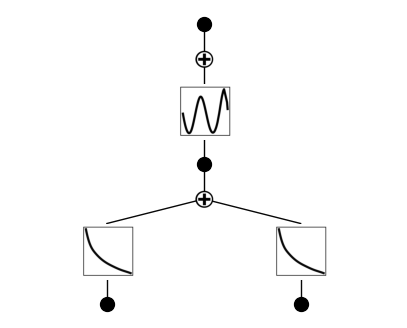

In [10]:
model.plot()

In [11]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

Best value at boundary.
r2 is 0.999884843826294
saving model version 0.2
Best value at boundary.
r2 is 0.9998899102210999
saving model version 0.3
r2 is 0.9975605010986328
saving model version 0.4


tensor(0.9976)

In [12]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 2.95e-07 | test_loss: 2.91e-07 | reg: 0.00e+00 | : 100%|█| 20/20 [00:01<00:00, 15.68it

saving model version 0.5


In [13]:
ex_round(model.symbolic_formula()[0][0], 3)

1.0*sin(2.0*log(9.993*x_1) + 2.0*log(10.0*x_2) - 9.209)

We were lucky -- singularity does not seem to be a problem in this case. But let's instead consider $f(x,y)=\sqrt{x^2+y^2}$. $x=y=0$ is a singularity point.

In [14]:
from kan import *
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=0)
f = lambda x: torch.sqrt(x[:,[0]]**2+x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.17e-03 | test_loss: 5.45e-03 | reg: 5.66e+00 | : 100%|█| 20/20 [00:02<00:00,  7.44it

saving model version 0.1


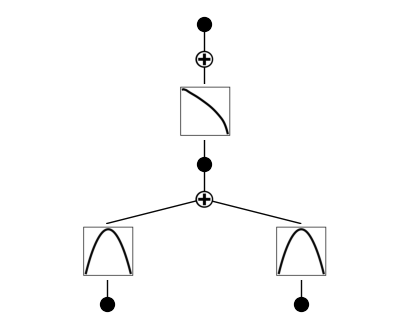

In [15]:
model.plot()

In [16]:
model.fix_symbolic(0,0,0,'x^2')
model.fix_symbolic(0,1,0,'x^2')
model.fix_symbolic(1,0,0,'sqrt')

r2 is 0.9999783635139465
saving model version 0.2
r2 is 0.9999676942825317
saving model version 0.3
r2 is 0.9997884631156921
saving model version 0.4


tensor(0.9998)

In [46]:
model = model.rewind('0.4')
model.get_act(dataset)

rewind to model version 1.4, renamed as 2.4


In [47]:
formula = model.symbolic_formula()[0][0]
formula

1.01334547419162*sqrt(0.999861446076389*(7.53297050423062e-5 - x_2)**2 + (0.000104069324734005 - x_1)**2 + 0.00834810636784406) - 0.0170296430587769

In [48]:
ex_round(formula, 2)

1.01*sqrt(x_1**2 + 1.0*x_2**2 + 0.01) - 0.02

w/ singularity avoiding (LBFGS may still get nan because of line search, but Adam won't get nan).

In [49]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False, singularity_avoiding=True);

| train_loss: 1.09e-07 | test_loss: 1.48e-07 | reg: 0.00e+00 | : 100%|█| 1000/1000 [00:12<00:00, 83.


saving model version 1.5


w/o singularity avoiding, nan may appear

In [50]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████| 1000/1000 [00:11<00:00, 84.83it/s]


saving model version 1.6
